##Bibliotecas:



In [457]:
#Importando Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Set

##Funções:

###Cria Ambiente:


In [458]:
# Cria os sensores aleatoriamente:
class sensor:
  def __init__(self, raio: float, posicao: Tuple[float, float], id: int):
    self.raio = raio
    self.posicao = posicao
    self.id = id

class sala:
  def __init__(self, altura: float, largura: float):
    self.altura = altura
    self.largura = largura

def cria_sensores(num_sensores: int, largura: float, altura: float, min: float, max: float):
  sensores = []
  id = 0
  for _ in range(num_sensores):
      # Gera uma posição aleatória dentro da sala
      x = np.random.uniform(0, largura)
      y = np.random.uniform(0, altura)

      # Gera um raio aleatório dentro dos limites especificados
      raio = np.random.uniform(min, max)

      # Cria o sensor como um dicionário e adiciona à lista
      sensores.append(sensor(raio, [x,y], id))
      id = id+1
  return sensores;

###Distância de 2 pontos:

In [459]:
# Retorna a distancia entre dois pontos a e b:
def dist(a: Tuple[float, float], b: Tuple[float, float])->float:
  dx = a[0] - b[0]
  dy = a[1] - b[1]
  return np.sqrt(dx**2 + dy**2)

###Auxiliares da solução:

In [460]:
#verifica se os sensores se interpelam e criam um caminho por consequência
def cria_caminho(a: sensor, b: sensor)->bool:
  if(dist(a.posicao,b.posicao) < a.raio + b.raio):
    return True
  return False
#verifica se o sensor enxerga a parede
def ve_parede(a: sensor, ambiente: sala)->bool:
  if(a.posicao[0] - a.raio <= 0):
    return True
  elif(a.posicao[0] + a.raio >= ambiente.largura):
    return True
  elif(a.posicao[1] - a.raio <= 0):
    return True
  elif(a.posicao[1] + a.raio >= ambiente.altura):
    return True
  return False

#define todos os sensores que vem a parede e cria uma lista para eles
def cria_lista_parede(sensores: list[sensor], ambiente: sala)->list[int]:
  lista_parede = []
  for i in range(len(sensores)):
    if(ve_parede(sensores[i], ambiente)):
      lista_parede.append(i)
  #print("Sensores parede")
  #for sensor in lista_parede:
    #print(sensor)
  return lista_parede

#cria a lista de adjancência
def cria_lista_adj(sensores: list[sensor]):
  adjacency_list = {}

  for i in range(len(sensores)):
    adjacency_list[i] = []

  for i in range(len(sensores) - 1):
    for j in range(i+1,len(sensores)):
      if(cria_caminho(sensores[i], sensores[j])):
        adjacency_list[i].append(j)
        adjacency_list[j].append(i)

  #for vertex, neighbors in adjacency_list.items():
    #print(f"{vertex} -> {' '.join(map(str, neighbors))}")

  return adjacency_list

#confere se dois sensores são solução ou não
#o caminho aqui nao importa, pois vou considerar que ele esta sendo feito certo e so checar se é soluçao ou nao
def solucao(a: sensor, b: sensor, ambiente: sala)->bool:
  #cima e direta
  if((a.posicao[1] + a.raio >= ambiente.altura and b.posicao[0] + b.raio >= ambiente.largura) or (b.posicao[1] + b.raio >= ambiente.altura and a.posicao[0] + a.raio >= ambiente.largura)):
    #print("coe1")
    return True
  #cima e baixo
  elif((a.posicao[1] + a.raio >= ambiente.altura and b.posicao[1] - b.raio <= 0) or (b.posicao[1] + b.raio >= ambiente.altura and a.posicao[1] - a.raio <= 0)):
    #print("coe2")
    return True
  #esquerda e direita
  elif((a.posicao[0] - a.raio <= 0 and b.posicao[0] + b.raio >= ambiente.largura) or (b.posicao[0] - b.raio <= 0 and a.posicao[0] + a.raio >= ambiente.largura)):
    #print("coe3")
    return True
  #esquerda e baixo
  elif((a.posicao[0] - a.raio <= 0 and b.posicao[1] - b.raio <= 0) or (b.posicao[0] - b.raio <= 0 and a.posicao[1] - a.raio <= 0)):
    #print("coe4")
    return True
  return False


###Solução do problema:

In [461]:
#checa se tem algum caminho, caso tenha adiciona esse caminho a uma lista
def resolver(sensores: list[sensor], ambiente: sala, lista_parede: list[int], lista_adj: dict[list[int]])->list[list[int]]:
  caminhos = list()
  pilha = list()
  while len(lista_parede) != 0:
    lista_ajuda = list()
    lista_ajuda.append(lista_parede[len(lista_parede)-1])
    pilha.append(lista_ajuda)
    lista_parede.pop()
    while len(pilha) != 0:
      #print(type(pilha))
      #print(type(pilha[0]))
      lista_atual = pilha[len(pilha)-1].copy()
      #print(len(lista_atual)-1)
      #print(len(pilha)-1)
      sensor_atual = lista_atual[len(lista_atual)-1]
      #print(type(pilha[0]))
      pilha.pop()
      #print(sensores[lista_atual[0]].posicao)
      #print(sensores[lista_atual[len(lista_atual)-1]].posicao)
      if(solucao(sensores[lista_atual[0]], sensores[lista_atual[len(lista_atual)-1]], ambiente)):
        #print("solucao")
        #posso depois adicionar a .reverse e comparar se algum caminho é igual ao reverse desse para
        #não adicionar dois caminhos iguais.
        caminhos.append(lista_atual)
      else:
        for num in lista_adj[sensor_atual]:
          copia = lista_atual.copy()
          if(copia.count(num) == 0):
            copia.append(num)
            pilha.append(copia)
            #print("entrei")
            #print("tamanho da pilha no final " + str(len(pilha)))

        #print("öi")

  return caminhos


###Plotagem da Sala:

In [462]:
#plota a sala:

def plota_sala(sensores: list[sensor], ambiente: sala, lista_parede: list[int], lista_adj: list[int], resultado: list[list[int]]):
  prop_ctt = 10
  if(ambiente.altura < ambiente.largura):
    fig, ax = plt.subplots(figsize = (prop_ctt, prop_ctt*ambiente.altura/ambiente.largura))
  else:
    fig, ax = plt.subplots(figsize = (prop_ctt*ambiente.largura/ambiente.altura, prop_ctt))
  #fig, ax = plt.subplots(figsize = (prop_ctt, prop_ctt))
  ax.set_xlim(0, ambiente.largura)
  ax.set_ylim(0, ambiente.altura)
  sensores_bloqueando = set(num for sublist in resultado for num in sublist)

  #plota início e fim:
  ax.plot(0, 0, 'go', markersize=15, label='Ladrão')
  ax.plot(ambiente.largura, ambiente.altura, 'ys', markersize=15, label='Arte')

  #plota sensores:
  for sensor in sensores: #rever como plotar o bloqueio
    formato = 'ro' if sensor.id in sensores_bloqueando else 'bo'
    cor = 'red' if sensor.id in sensores_bloqueando else 'blue'
    ax.plot(sensor.posicao[0], sensor.posicao[1], formato)
    circle = plt.Circle((sensor.posicao[0], sensor.posicao[1]), sensor.raio, color=cor, alpha = 0.2)
    ax.add_artist(circle)

  #plota as arestas:
  for i, adjacentes in lista_adj.items():
    for adj in adjacentes:
      #print(i, adj)
      if(i in sensores_bloqueando and adj in sensores_bloqueando):
        formato = 'r-'
      else:
        formato = 'k-'
      x1, y1 = sensores[i].posicao
      x2, y2 = sensores[adj].posicao
      ax.plot([x1, x2], [y1, y2], formato, lw=1)

  #conecta com as paredes:
  for sensor_index in lista_parede:
    sensor = sensores[sensor_index]
    x, y = sensor.posicao
    if(sensor_index in sensores_bloqueando):
      formato = 'r-'
    else:
      formato = 'k-'

    # Verifica a parede mais próxima e desenha uma linha
    if sensor.posicao[0] - sensor.raio <= 0:
      ax.plot([x, 0], [y, y], formato, lw=1)
      #print(f"esquerda: {sensor_index}")
    if sensor.posicao[0] + sensor.raio >= ambiente.largura:
      ax.plot([x, ambiente.largura], [y, y], formato, lw=1)
      #print(f"direita: {sensor_index}")
    if sensor.posicao[1] - sensor.raio <= 0:
      ax.plot([x, x], [y, 0], formato, lw=1)
      #print(f"baixo: {sensor_index}")
    if sensor.posicao[1] + sensor.raio >= ambiente.altura:
      ax.plot([x, x], [y, ambiente.altura], formato, lw=1)
      #print(f"cima: {sensor_index}")

    #print(resultado)
    #Título:
    if(resultado == []):
      plt.title("É possível roubar a arte!")
    else:
      plt.title("Não é possível roubar a arte!")

    plt.legend(title="Legenda", loc='lower center', bbox_to_anchor=(0.5, -0.11), ncol=2)


##Código Principal:

Largura: 100
Altura: 100
Num de sensores: 20
Raio Minimo: 10
Raio Maximo: 12


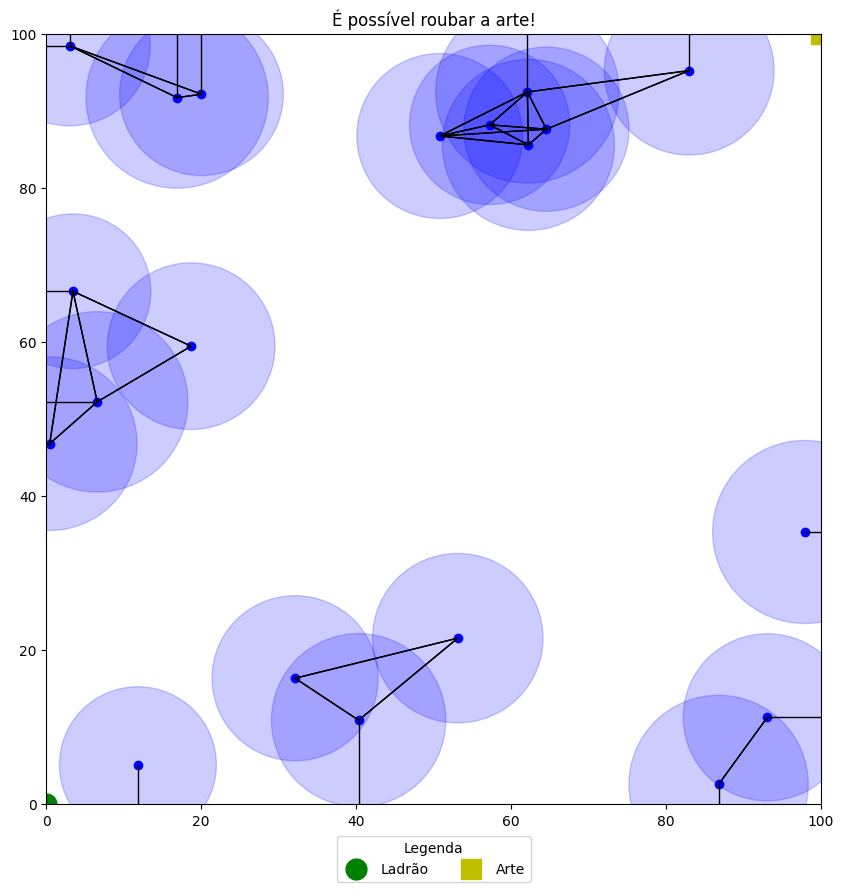

In [465]:
largura = float(input("Largura: "))
altura = float(input("Altura: "))
num_sensores = int(input("Num de sensores: "))
raio_min = float(input("Raio Minimo: "))
raio_max = float(input("Raio Maximo: "))

'''largura = 100.0
altura = 100.0
num_sensores = 20
raio_min = 10.0
raio_max = 12.0'''

galeria = sala(altura, largura)
sensores = cria_sensores(num_sensores, largura, altura, raio_min, raio_max)

lista_adj = cria_lista_adj(sensores)
lista_parede = cria_lista_parede(sensores, galeria)
lista_plt_parede = []
for i in range(len(lista_parede)):
  lista_plt_parede.append(lista_parede[i])

resultado = resolver(sensores, galeria, lista_parede, lista_adj)
plota_sala(sensores, galeria, lista_plt_parede, lista_adj, resultado);